***
### Data Import and Exploratory Data Analysis
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10948\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\archive (4)\Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [5]:
df.shape

(2500, 10)

In [6]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
df.duplicated().sum()

0

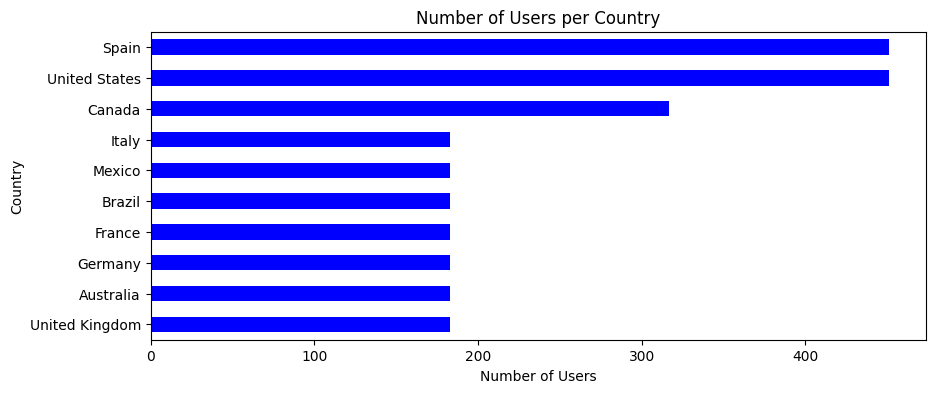

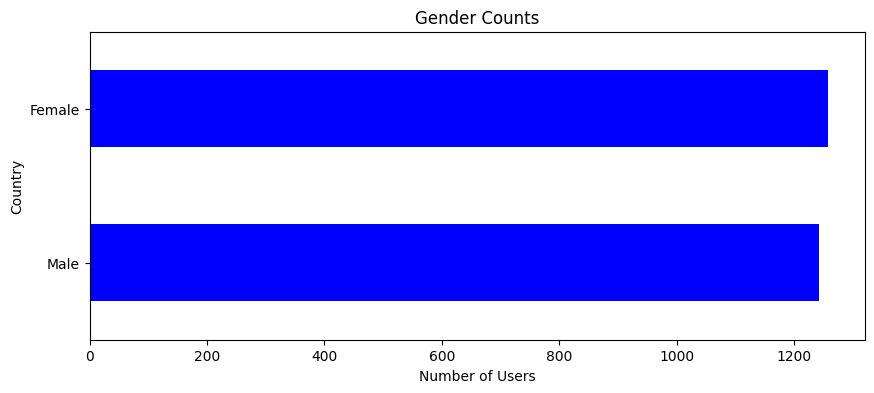

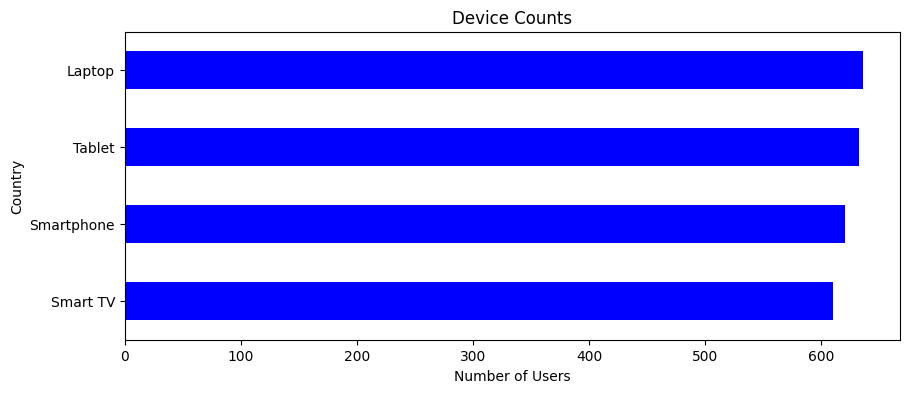

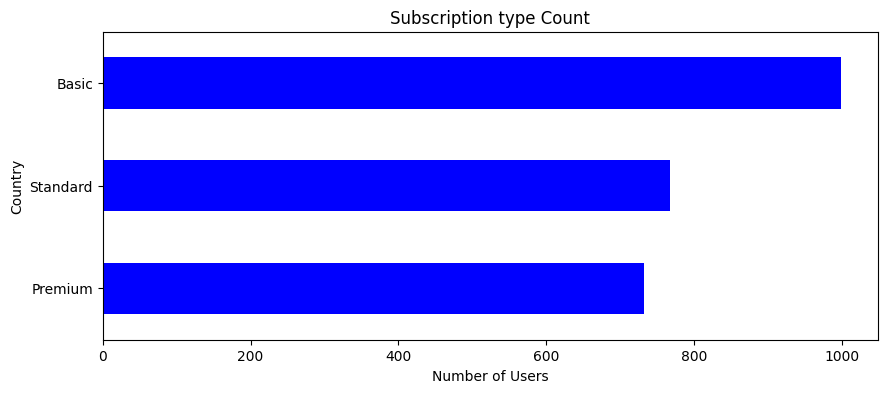

In [8]:
column_titles = {'Country':'Number of Users per Country', 'Gender':'Gender Counts', 'Device':'Device Counts', 'Subscription Type': 'Subscription type Count'}


for col, title in column_titles.items():
    plt.figure(figsize = (10,4))
    df[col].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue')
    plt.title(title)
    plt.ylabel("Country")
    plt.xlabel("Number of Users")
    plt.show()


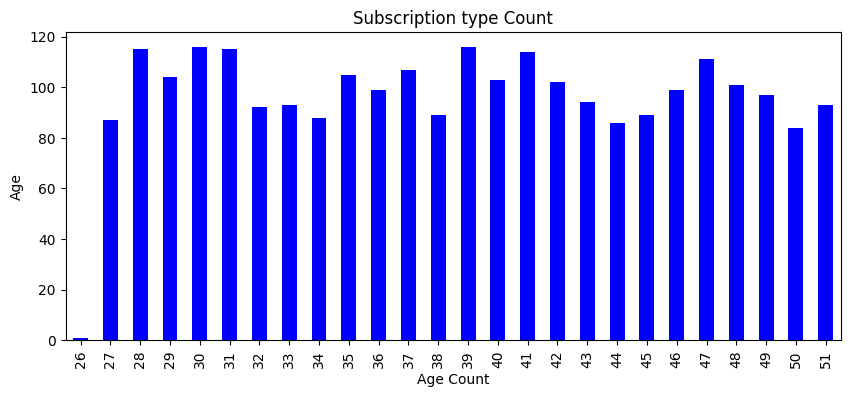

In [9]:
plt.figure(figsize = (10,4))
df['Age'].value_counts().sort_index(ascending = True).plot(kind = 'bar', color = 'blue')
plt.title(title)
plt.ylabel("Age")
plt.xlabel("Age Count")
plt.show()


***
### Generate Key Metrics
***

In [28]:
# Calculate Number of Months Subscribed per user
df['Join Date'] = pd.to_datetime(df['Join Date'], format ='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format ='%d-%m-%y')

def calculate_months(join_date, last_payment_date):
    # Calculate the difference in years and months
    year_diff = last_payment_date.year - join_date.year
    month_diff = last_payment_date.month - join_date.month
    
    # Total months difference
    total_months = year_diff * 12 + month_diff
    
    # Adjust for day difference
    if last_payment_date.day >= join_date.day:
        total_months += 1
        
    return total_months


df['Number of Months Subscribed'] = df.apply(lambda row: calculate_months(row['Join Date'], row['Last Payment Date']), axis=1)

# Calculate Total Revenue Per User or CLTV
df['CLTV (Total Revenue Per User)'] = df['Monthly Revenue'] * df['Number of Months Subscribed']

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Months Subscribed,CLTV (Total Revenue Per User),Status
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,17,170,Inactive
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,22,330,Active
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,4,48,Active
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,12,144,Active
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2,20,Active


We notice that some dates from "Join Date" and "Last Payment Date" Columns have been swapped.

***
### Data Cleaning
***

In [29]:
df['Number of Months Subscribed'].sort_values(ascending= True)
df[df['Number of Months Subscribed'] < 0] #join date and last payment dates are swapped causeing negative months values

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Months Subscribed,CLTV (Total Revenue Per User),Status


In [30]:
df[df['Number of Months Subscribed'] < 0]['User ID']

Series([], Name: User ID, dtype: int64)

In [31]:
error_indices = df[df['Number of Months Subscribed'] < 0].index.tolist() 


for index in error_indices:
    temp = df.at[index, 'Join Date']  # Store the 'Join Date' temporarily
    df.at[index, 'Join Date'] = df.at[index, 'Last Payment Date']  # Swap 'Join Date' with 'Last Payment Date'
    df.at[index, 'Last Payment Date'] = temp  # Assign the stored 'Join Date' to 'Last Payment Date'


In [32]:
#Recalculate 
# Calculate Number of Months Subscribed per user
def calculate_months(join_date, last_payment_date):
    # Calculate the difference in years and months
    year_diff = last_payment_date.year - join_date.year
    month_diff = last_payment_date.month - join_date.month
    
    # Total months difference
    total_months = year_diff * 12 + month_diff
    
    # Adjust for day difference
    if last_payment_date.day >= join_date.day:
        total_months += 1
        
    return total_months


df['Number of Months Subscribed'] = df.apply(lambda row: calculate_months(row['Join Date'], row['Last Payment Date']), axis=1)

# Calculate Total Revenue Per User
df['CLTV (Total Revenue Per User)'] = df['Monthly Revenue'] * df['Number of Months Subscribed']

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Months Subscribed,CLTV (Total Revenue Per User),Status
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,17,170,Inactive
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,22,330,Active
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,4,48,Active
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,12,144,Active
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2,20,Active


In [33]:
import pandas as pd

# Calculate the number of months subscribed
def calculate_months_subscribed(join_date, last_payment_date):
    # Calculate the number of months subscribed
    return (last_payment_date.year - join_date.year) * 12 + last_payment_date.month - join_date.month + (last_payment_date.day >= join_date.day)

df['Number of Months Subscribed'] = df.apply(lambda row: calculate_months_subscribed(row['Join Date'], row['Last Payment Date']), axis=1)

# Calculate CLTV
df['CLTV (Total Revenue Per User)'] = df['Monthly Revenue'] * df['Number of Months Subscribed']

# Print average and standard deviation
print(f'Average number of months a user stays subscribed: {df["Number of Months Subscribed"].mean():.2f} months.')
print(f'Standard deviation for months subscribed: {df["Number of Months Subscribed"].std():.2f} months.')


Average number of months a user stays subscribed: 10.68 months.
Standard deviation for months subscribed: 2.07 months.


In [34]:
df[df['Number of Months Subscribed'] < 0].value_counts()

Series([], Name: count, dtype: int64)

***
### Subscription Metrics
***

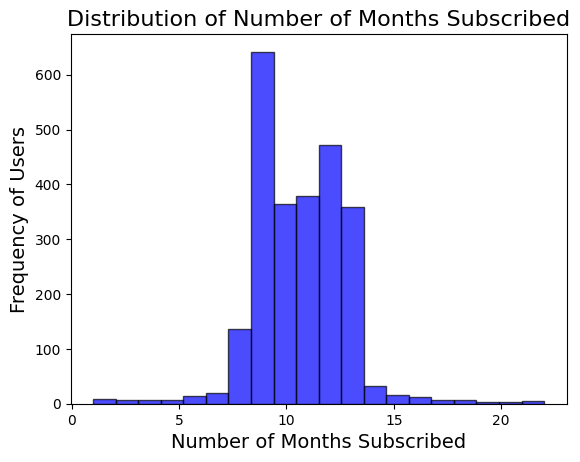

In [35]:
# Create histogram
df['Number of Months Subscribed'].plot(kind='hist', 
                                       bins=20,  # Adjust the number of bins
                                       color='blue',  # Choose a color
                                       edgecolor='black',  # Add edge color for better visibility
                                       alpha=0.7)  # Adjust transparency for better overlapping

plt.title('Distribution of Number of Months Subscribed', fontsize=16)
plt.xlabel('Number of Months Subscribed', fontsize=14)
plt.ylabel('Frequency of Users', fontsize=14)
plt.show()

In [36]:
print(f'Average number of months a user stays subscribed: {df['Number of Months Subscribed'].mean()} months.')
print(f'Standard deviation for months subscribed: {df['Number of Months Subscribed'].std():.2f} months.')

Average number of months a user stays subscribed: 10.6804 months.
Standard deviation for months subscribed: 2.07 months.


In [37]:

# Convert 'Last Payment Date' to datetime
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%Y')

# Calculate the cutoff date for active users
last_date = df['Last Payment Date'].max()
cutoff_date = last_date - pd.Timedelta(days=30)

# Determine the status of each user
df['Status'] = df['Last Payment Date'].apply(lambda x: 'Active' if x >= cutoff_date else 'Inactive')

# Count active and inactive users
active_count = df[df['Status'] == 'Active'].shape[0]
inactive_count = df[df['Status'] == 'Inactive'].shape[0]
total_count = active_count + inactive_count

# Print counts
print(f"Active users count: {active_count}")
print(f"Inactive users count: {inactive_count}")

# Calculate percentage of active users
if total_count > 0:
    percent_active_accounts = 100 * active_count / total_count
else:
    percent_active_accounts = 0

print(f'Percent of active users: {round(percent_active_accounts, 2)}%.')


Active users count: 2499
Inactive users count: 1
Percent of active users: 99.96%.


In [38]:
#Churn rate
churn_rate = (df[df['Status'] == 'Inactive']['User ID'].nunique()) / df['User ID'].nunique()
print(f'Customer churn rate: {churn_rate:.2%}.')

#Retention Rate
retention_rate = 1 - churn_rate
print(f"Retention Rate: {retention_rate:.2%}")

Customer churn rate: 0.04%.
Retention Rate: 99.96%


In [39]:
#subscription distribution
sub_type_count = df.groupby('Subscription Type')['User ID'].count().sort_values(ascending = False)
sub_type_count

Subscription Type
Basic       999
Standard    768
Premium     733
Name: User ID, dtype: int64

In [40]:
months_by_country = df.groupby('Country')['Number of Months Subscribed'].sum().sort_values(ascending = False)
print(months_by_country)

Country
United States     4778
Spain             4686
Canada            3420
France            2038
United Kingdom    2035
Australia         2000
Brazil            1989
Mexico            1970
Germany           1946
Italy             1839
Name: Number of Months Subscribed, dtype: int64


***
### Revenue Metrics
***

In [41]:
#Average Revenue Per User (ARPU): Total Revenue / Total Number of Users
ARPU = round(df['CLTV (Total Revenue Per User)'].sum() / df['User ID'].count(),2)
print(f'Total Lifetime Average Revenue per User is: ${ARPU} USD.')

Total Lifetime Average Revenue per User is: $133.59 USD.


In [42]:
#Revenue by Subscription Type: Calculate revenue generated by each subscription type (Basic, Standard, Premium).
sub_type = df.groupby('Subscription Type')
sub_type['CLTV (Total Revenue Per User)'].sum().sort_values(ascending = False)

Subscription Type
Basic       132617
Standard    103122
Premium      98237
Name: CLTV (Total Revenue Per User), dtype: int64

In [43]:
#Total Monthly Revenue
total_monthly_revenue = df['CLTV (Total Revenue Per User)'].sum()
print(f'Total Monthly Revenue: ${total_monthly_revenue} USD.')

Total Monthly Revenue: $333976 USD.


In [44]:
print(f'Average revenue generated per user: ${df['CLTV (Total Revenue Per User)'].mean():.2f} USD.')
print(f'Standard deviation for revenue generated per user: ${df['CLTV (Total Revenue Per User)'].std():.2f} USD.')

Average revenue generated per user: $133.59 USD.
Standard deviation for revenue generated per user: $31.51 USD.


In [45]:
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending = False)
print(revenue_by_country)


Country
United States     5664
Spain             5662
Canada            3950
United Kingdom    2318
Italy             2317
France            2307
Brazil            2285
Australia         2271
Germany           2260
Mexico            2237
Name: Monthly Revenue, dtype: int64


In [46]:
sum_cltv_by_country = df.groupby('Country')['CLTV (Total Revenue Per User)'].sum().sort_values(ascending= True)
sum_cltv_by_country

Country
Italy             23399
Germany           24044
Mexico            24050
Brazil            24755
Australia         24793
United Kingdom    25789
France            25813
Canada            42653
Spain             58752
United States     59928
Name: CLTV (Total Revenue Per User), dtype: int64

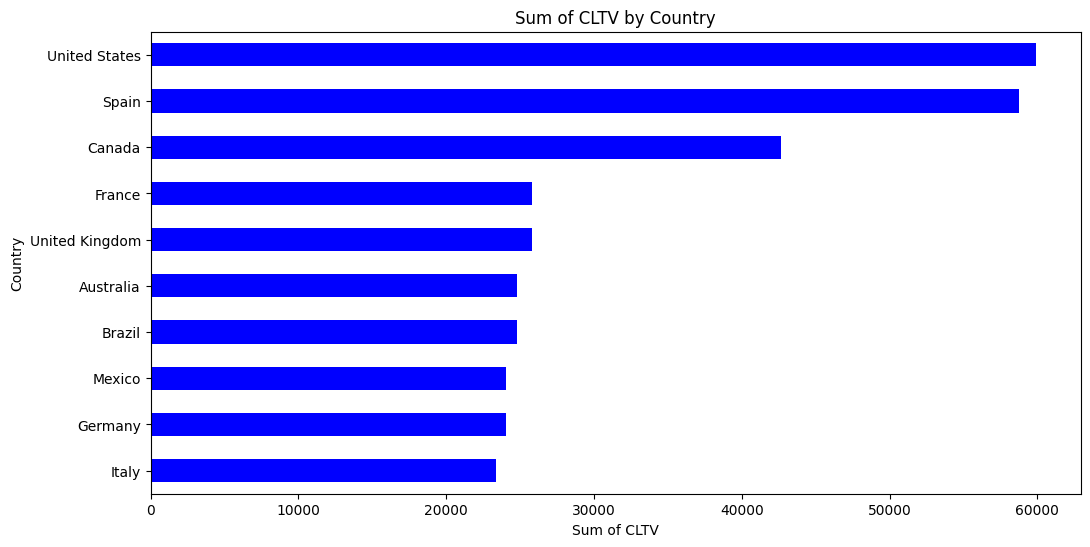

In [47]:
plt.figure(figsize = (12,6))
sum_cltv_by_country.plot(kind = 'barh', color = 'blue')
plt.title("Sum of CLTV by Country")
plt.xlabel("Sum of CLTV")
plt.ylabel("Country")
plt.show()

In [48]:
avg_cltv_by_country = df.groupby('Country')['CLTV (Total Revenue Per User)'].mean().sort_values(ascending= True)
avg_cltv_by_country 

Country
Italy             127.863388
Spain             130.270510
Germany           131.387978
Mexico            131.420765
United States     132.878049
Canada            134.552050
Brazil            135.273224
Australia         135.480874
United Kingdom    140.923497
France            141.054645
Name: CLTV (Total Revenue Per User), dtype: float64

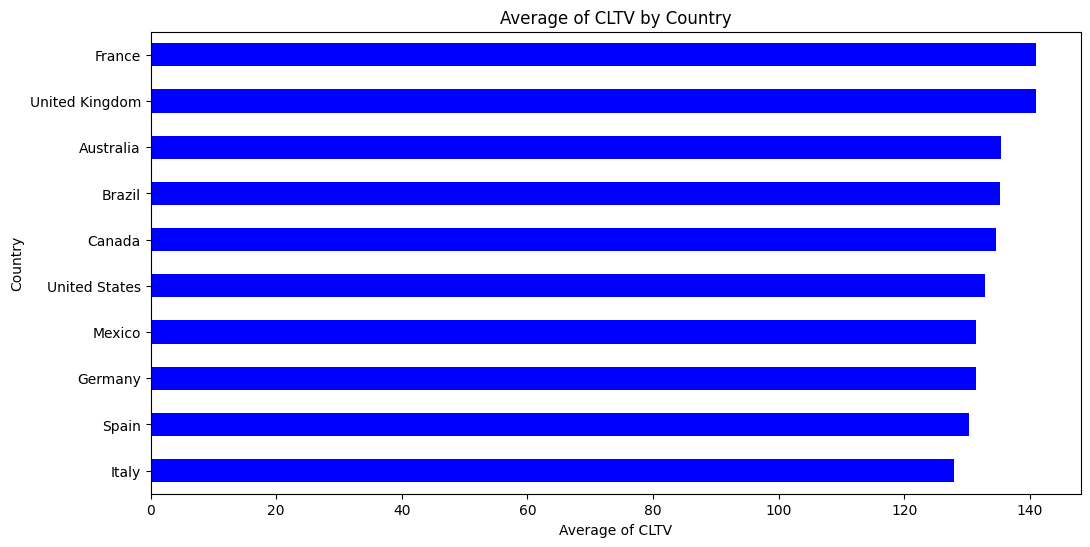

In [49]:
plt.figure(figsize = (12,6))
avg_cltv_by_country.plot(kind = 'barh', color = 'blue')
plt.title("Average of CLTV by Country")
plt.xlabel("Average of CLTV")
plt.ylabel("Country")
plt.show()

#why does UK and France have higher average CLTV despite US having more subscribers?
#-- because there are more basic subscribers in US. to increase CLTV see if you can promote US customer base to use higher teir subscriptions

In [50]:
revenue_by_device = df.groupby('Device')['CLTV (Total Revenue Per User)'].sum().sort_values(ascending = True)
revenue_by_device

Device
Smart TV      80703
Smartphone    83052
Laptop        84294
Tablet        85927
Name: CLTV (Total Revenue Per User), dtype: int64

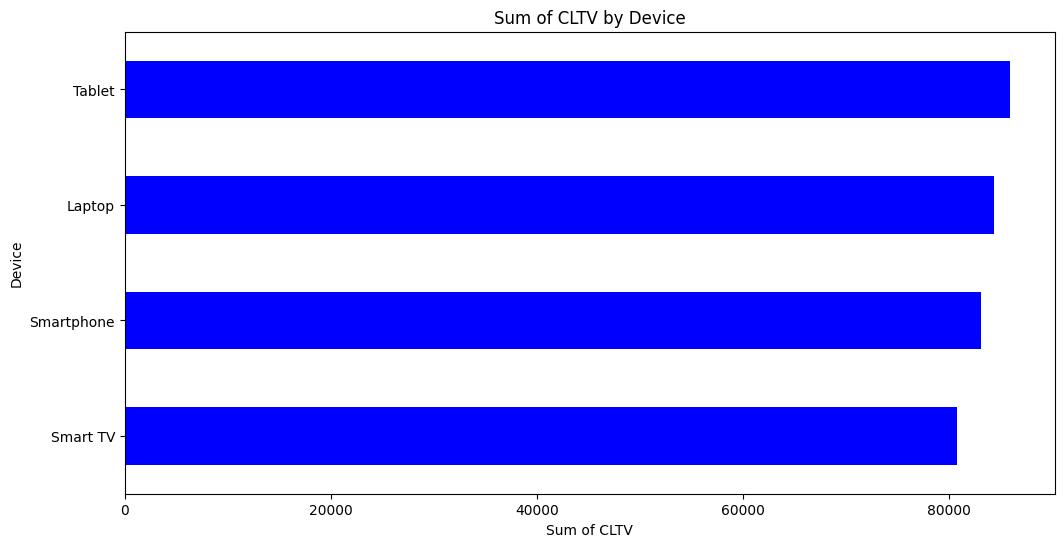

In [51]:
plt.figure(figsize = (12,6))
revenue_by_device.plot(kind = 'barh', color = 'blue')
plt.title("Sum of CLTV by Device")
plt.xlabel("Sum of CLTV")
plt.ylabel("Device")
plt.show()


***
### User Behaviour Metrics
***

In [52]:
device_type = df.groupby('Device')['User ID'].count().sort_values(ascending = False)
device_type

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: User ID, dtype: int64

In [53]:
#gender distribusion
gender_distribution = df['Gender'].value_counts(normalize=True)
print(gender_distribution)


Gender
Female    0.5028
Male      0.4972
Name: proportion, dtype: float64


In [54]:
# Time Since Last Payment: Difference between the current date and the last payment date for each user.
df['Time Since Last Payment'] = last_date -  df['Last Payment Date']
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Months Subscribed,CLTV (Total Revenue Per User),Status,Time Since Last Payment
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,17,170,Inactive,35 days
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,22,330,Active,23 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,4,48,Active,18 days
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,12,144,Active,19 days
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2,20,Active,17 days


In [55]:
#Average user age
average_age = df['Age'].mean()
print(f"Average User Age: {average_age:.2f} years")

Average User Age: 38.80 years


***
### Bivariate Analysis
***

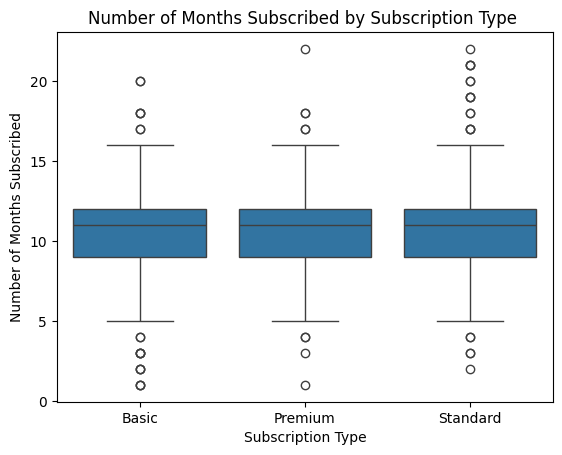

In [56]:
sns.boxplot(x='Subscription Type', y='Number of Months Subscribed', data=df)
plt.title('Number of Months Subscribed by Subscription Type ')
plt.show()


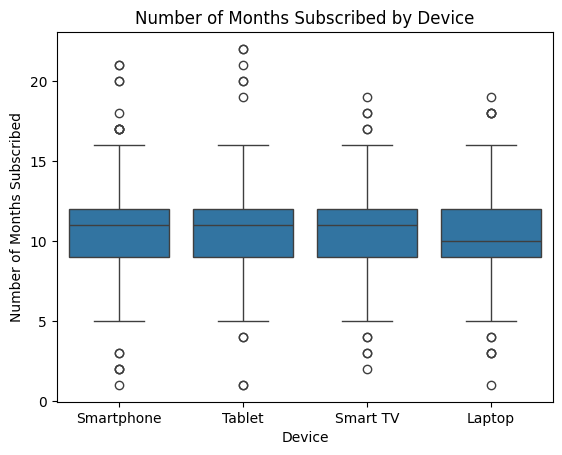

In [57]:
sns.boxplot(x='Device', y='Number of Months Subscribed', data=df)
plt.title('Number of Months Subscribed by Device')
plt.show()

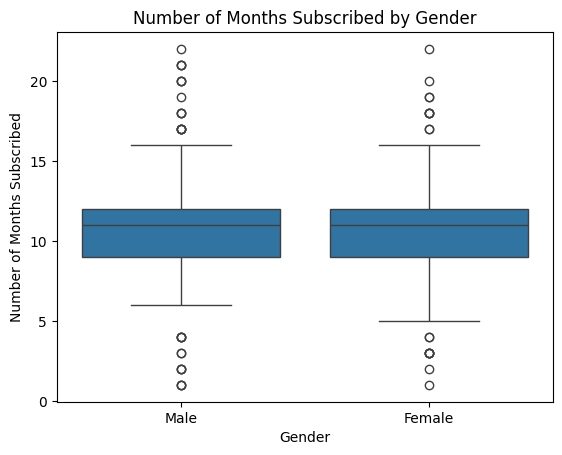

In [58]:
sns.boxplot(x='Gender', y='Number of Months Subscribed', data=df)
plt.title('Number of Months Subscribed by Gender')
plt.show()

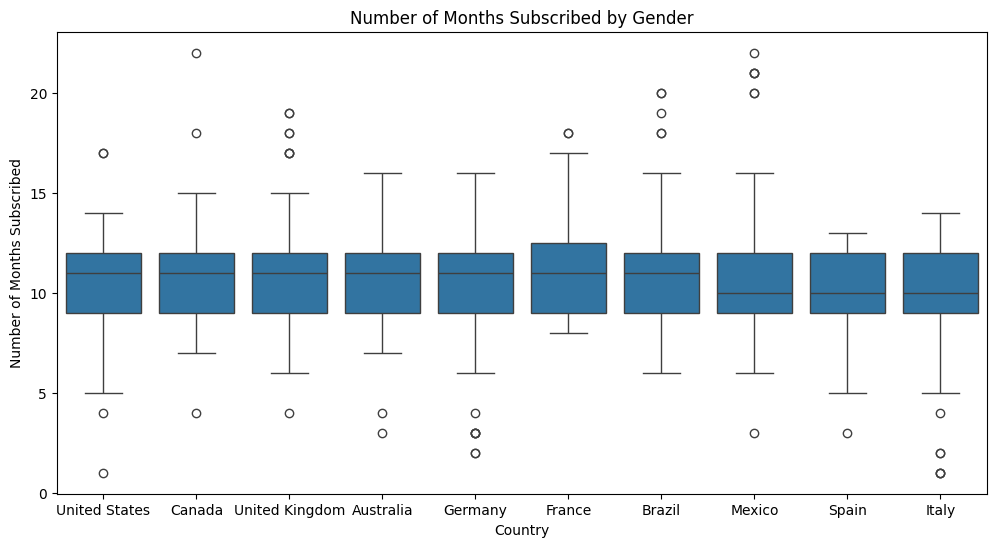

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Number of Months Subscribed', data=df)
plt.title('Number of Months Subscribed by Gender')
plt.show()

In [60]:
#will use powerbi to create more complex visuals
sub_by_country_type = df.pivot_table(index = 'Country', columns = 'Subscription Type', values = 'User ID', aggfunc = 'count', fill_value = 0)
sub_by_country_type['Total'] = sub_by_country_type.sum(axis = 1)
sub_by_country_type

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


In [61]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Months Subscribed,CLTV (Total Revenue Per User),Status,Time Since Last Payment
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,17,170,Inactive,35 days
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,22,330,Active,23 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,4,48,Active,18 days
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,12,144,Active,19 days
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2,20,Active,17 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,12,168,Active,3 days
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,12,180,Active,1 days
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,12,144,Active,0 days
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,12,156,Active,3 days


In [62]:
#read dataframe into csv for further analysis.
path = r"C:\Users\Administrator\Downloads\Netflix Userbase Cleaned.csv"
df.to_csv(path, index = False)